### read

In [1]:
ew_2013_s = pd.read_pickle('./data/ew_2013_s.pkl')  # 16229
ew_2013_s.shape[0]

131682106

In [1]:
ea_2013_s = pd.read_pickle('./data/ea_2013_s.pkl')  # 16229
ea_2013_s.shape[0]

131682106

In [1]:
ew_2015_s = pd.read_pickle('./data/ew_2015_s.pkl')  # 16660
ew_2015_s.shape[0]

138769470

In [6]:
ea_2015_s = pd.read_pickle('./data/ea_2015_s.pkl')  # 16660
ea_2015_s.shape[0]

138769470

In [2]:
emb_sim_2013_s = pd.read_pickle('./data/emb_sim_2013_s.pkl')  # 16229
emb_sim_2013_s.shape[0]

131682106

15431 = concept intersection for 2013 and 2015 years

## dividing by thresholds

!!! <font color='red'>64 GB RAM reqired</font> !!!

Ran on `Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, 4 Cores, 8 Threads machine, 64 GB RAM (+64 GB swap), ~400 GB NVMe SSD`

### weight

Let's set stat. sign. weight == 10 (might be change)

In [8]:
ew_threshold = 10

#### form

In [17]:
wgpg_2013 = ew_2013_s[ew_2013_s > ew_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()
wbpg_2013 = ew_2013_s[ew_2013_s <= ew_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()

with open('./data/wgpg_2013.txt', 'w') as f:
    for p in tn(wgpg_2013):
        f.write(f'{p}\n')
with open('./data/wbpg_2013.txt', 'w') as f:
    for p in tn(wbpg_2013):
        f.write(f'{p}\n')

len(wgpg_2013), len(wbpg_2013)

(1844453, 129837653)

In [6]:
len(wgpg_2013) / ew_2013_s.shape[0]

0.014006861342269238

In [3]:
wgpg_2015 = ew_2015_s[ew_2015_s > ew_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()

with open('./data/wgpg_2015.txt', 'w') as f:
    for p in tn(wgpg_2015):
        f.write(f'{p}\n')
len(wgpg_2015)

2227384

In [11]:
len(wgpg_2015) / ew_2015_s.shape[0]

0.016050965677104626

#### read

In [1]:
with open('./data/wgpg_2013.txt') as f:
    wgpg_2013 = f.read().split('\n')[:-1]
    wgpg_2013 = set(wgpg_2013)
with open('./data/wbpg_2013.txt') as f:
    wbpg_2013 = f.read().split('\n')[:-1]
    wbpg_2013 = set(wbpg_2013)
len(wgpg_2013), len(wbpg_2013)

(1844453, 129837653)

In [2]:
len(wgpg_2013) / (len(wgpg_2013) + len(wbpg_2013))

0.014006861342269238

In [3]:
with open('./data/wgpg_2015.txt') as f:
    wgpg_2015 = f.read().split('\n')[:-1]
    wgpg_2015 = set(wgpg_2015)
len(wgpg_2015)

2227384

In [24]:
len(wgpg_2015) / ew_2015_s.shape[0]

0.016062533592905857

### alpha p-value

We set stat. sign. alpha to 0.1 which ~ top 15% links, ~0.15 p-value (might be change)

In [23]:
eapv_threshold = .15
ea_threshold = .1#ea_2013_s.sort_values()[int(eapv_threshold * ea_2013_s.shape[0])]
ea_threshold

0.1

#### form

In [4]:
agpg_2013 = ea_2013_s[ea_2013_s < ea_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()
abpg_2013 = ea_2013_s[ea_2013_s >= ea_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()

with open('./data/agpg_2013.txt', 'w') as f:
    for p in tn(agpg_2013):
        f.write(f'{p}\n')
with open('./data/abpg_2013.txt', 'w') as f:
    for p in tn(abpg_2013):
        f.write(f'{p}\n')

len(agpg_2013), len(abpg_2013)

(1642958, 130039148)

In [5]:
len(agpg_2013) / ea_2013_s.shape[0]

0.012476698998115963

In [7]:
agpg_2015 = ea_2015_s[ea_2015_s < ea_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()

with open('./data/agpg_2015.txt', 'w') as f:
    for p in tn(agpg_2015):
        f.write(f'{p}\n')
len(agpg_2015)

1869488

In [8]:
len(agpg_2015) / ea_2015_s.shape[0]

0.013471896952550154

#### read

In [2]:
with open('./data/agpg_2013.txt') as f:
    agpg_2013 = f.read().split('\n')[:-1]
    agpg_2013 = set(agpg_2013)
with open('./data/abpg_2013.txt') as f:
    abpg_2013 = f.read().split('\n')[:-1]
    abpg_2013 = set(abpg_2013)
len(agpg_2013), len(abpg_2013)

(1642958, 130039148)

In [3]:
len(agpg_2013) / (len(agpg_2013) + len(abpg_2013))

0.012476698998115963

In [4]:
with open('./data/agpg_2015.txt') as f:
    agpg_2015 = f.read().split('\n')[:-1]
    agpg_2015 = set(agpg_2015)
len(agpg_2015)

1869488

In [10]:
len(agpg_2015) / ea_2015_s.shape[0]

0.013471896952550154

### embedding similarity

Let's set stat. sign. similarity == 0.6 (might be change)

In [12]:
emb_sim_threshold = .6

#### form

In [4]:
gpe_2013 = emb_sim_2013_s[emb_sim_2013_s > emb_sim_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()
bpe_2013 = emb_sim_2013_s[emb_sim_2013_s <= emb_sim_threshold].index.map(lambda p: f'{p[0]}-{p[1]}').sort_values().tolist()

with open('./data/gpe_2013.txt', 'w') as f:
    for p in tn(gpe_2013):
        f.write(f'{p}\n')
with open('./data/bpe_2013.txt', 'w') as f:
    for p in tn(bpe_2013):
        f.write(f'{p}\n')

len(gpe_2013), len(bpe_2013)

(1994233, 129687873)

In [9]:
len(gpe_2013) / emb_sim_2013_s.shape[0]

0.0151442975858846

#### read

In [13]:
with open('./data/gpe_2013.txt') as f:
    gpe_2013 = f.read().split('\n')[:-1]
    gpe_2013 = set(gpe_2013)
with open('./data/bpe_2013.txt') as f:
    bpe_2013 = f.read().split('\n')[:-1]
    bpe_2013 = set(bpe_2013)
len(gpe_2013), len(bpe_2013)

(1994233, 129687873)

In [5]:
len(gpe_2013) / (len(gpe_2013) + len(bpe_2013))

0.0151442975858846

## final tables

### weight

In [9]:
mtrx = pd.DataFrame(data=[[wbpg_2013], [wgpg_2013]],
                    index=[fr'$w \leq {ew_threshold}$', fr'$w > {ew_threshold}$'],
                    columns=['links'])
abs_mtrx = mtrx.applymap(len)
abs_mtrx

,links
$w \leq 10$,129837653
$w > 10$,1844453


In [10]:
del wbpg_2013
del wgpg_2013

In [13]:
abs_mtrx / abs_mtrx.sum() * 100

,links
$w \leq 10$,98.599314
$w > 10$,1.400686


In [26]:
new_mtrx = mtrx.applymap(lambda x: x & wgpg_2015)
new_abs_mtrx = new_mtrx.applymap(len)
new_abs_mtrx

,links
$w \leq 10$,564330
$w > 10$,1662432


In [16]:
new_abs_mtrx.sum()

links    2226762
dtype: int64

In [15]:
new_abs_mtrx / abs_mtrx * 100

,links
$w \leq 10$,0.004346
$w > 10$,0.901314


In [33]:
ext_abs_mtrx = pd.concat([mtrx.applymap(lambda x: len(x & bpe_2013)), mtrx.applymap(lambda x: len(x & gpe_2013))], 1)
ext_abs_mtrx.columns = [fr'$s_{{emb}} \leq {emb_sim_threshold}$', f'$s_{{emb}} > {emb_sim_threshold}$']
ext_abs_mtrx

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$w \leq 10$,128263658,1573995
$w > 10$,1424215,420238


Percentage of similar ($s_{emb} > 0.6$) links

In [21]:
(ext_abs_mtrx.iloc[:,1] / ext_abs_mtrx.sum(1)).to_frame() * 100

,0
$w \leq 10$,1.212279
$w > 10$,22.783882


In [28]:
new_ext_abs_mtrx = pd.concat([new_mtrx.applymap(lambda x: len(x & bpe_2013)), new_mtrx.applymap(lambda x: len(x & gpe_2013))], 1)
new_ext_abs_mtrx.columns = [fr'$s_{{emb}} \leq {emb_sim_threshold}$', f'$s_{{emb}} > {emb_sim_threshold}$']
new_ext_abs_mtrx

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$w \leq 10$,514178,50152
$w > 10$,1265962,396470


In [29]:
new_ext_abs_mtrx.sum().sum()

2226762

In [30]:
len(wgpg_2015) - new_ext_abs_mtrx.sum().sum()

622

In [31]:
(len(wgpg_2015) - new_ext_abs_mtrx.sum().sum()) / new_ext_abs_mtrx.sum().sum()

0.0002793293580544306

In [37]:
perc_mtrx = new_ext_abs_mtrx / ext_abs_mtrx
perc_mtrx * 100

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$w \leq 10$,0.400876,3.186287
$w > 10$,88.888405,94.344157


### alpha p-value

In [5]:
mtrx = pd.DataFrame(data=[[abpg_2013], [agpg_2013]],
                    index=[fr'$\alpha \geq {ea_threshold}$', fr'$\alpha < {ea_threshold}$'],
                    columns=['links'])
abs_mtrx = mtrx.applymap(len)
abs_mtrx

,links
$\alpha \geq 0.1$,130039148
$\alpha < 0.1$,1642958


In [6]:
del abpg_2013
del agpg_2013

In [7]:
abs_mtrx / abs_mtrx.sum() * 100

,links
$\alpha \geq 0.1$,98.75233
$\alpha < 0.1$,1.24767


In [8]:
new_mtrx = mtrx.applymap(lambda x: x & agpg_2015)
new_abs_mtrx = new_mtrx.applymap(len)
new_abs_mtrx

,links
$\alpha \geq 0.1$,475788
$\alpha < 0.1$,1389652


In [9]:
new_abs_mtrx.sum()

links    1865440
dtype: int64

In [21]:
new_abs_mtrx / abs_mtrx * 100

,links
$\alpha \geq 0.1$,0.365881
$\alpha < 0.1$,84.582320


In [14]:
ext_abs_mtrx = pd.concat([mtrx.applymap(lambda x: len(x & bpe_2013)), mtrx.applymap(lambda x: len(x & gpe_2013))], 1)
ext_abs_mtrx.columns = [fr'$s_{{emb}} \leq {emb_sim_threshold}$', f'$s_{{emb}} > {emb_sim_threshold}$']
ext_abs_mtrx

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$\alpha \geq 0.1$,128412677,1626471
$\alpha < 0.1$,1275196,367762


Percentage of similar ($s_{emb} > 0.6$) links

In [15]:
(ext_abs_mtrx.iloc[:,1] / ext_abs_mtrx.sum(1)).to_frame() * 100

,0
$\alpha \geq 0.1$,1.250755
$\alpha < 0.1$,22.384139


In [16]:
new_ext_abs_mtrx = pd.concat([new_mtrx.applymap(lambda x: len(x & bpe_2013)), new_mtrx.applymap(lambda x: len(x & gpe_2013))], 1)
new_ext_abs_mtrx.columns = [fr'$s_{{emb}} \leq {emb_sim_threshold}$', f'$s_{{emb}} > {emb_sim_threshold}$']
new_ext_abs_mtrx

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$\alpha \geq 0.1$,426902,48886
$\alpha < 0.1$,1054765,334887


In [17]:
new_ext_abs_mtrx.sum().sum()

1865440

In [18]:
len(agpg_2015) - new_ext_abs_mtrx.sum().sum()

4048

In [19]:
(len(agpg_2015) - new_ext_abs_mtrx.sum().sum()) / new_ext_abs_mtrx.sum().sum()

0.0021699974268805213

In [20]:
perc_mtrx = new_ext_abs_mtrx / ext_abs_mtrx
perc_mtrx * 100

,$s_{emb} \leq 0.6$,$s_{emb} > 0.6$
$\alpha \geq 0.1$,0.332445,3.005648
$\alpha < 0.1$,82.713951,91.060795


## scatterplot: embeddings similarity to weights

In [3]:
plt.rcParams['font.size'] = 32
plt.rcParams['figure.facecolor'] = '1'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# for c in ['size', 'pad', 'width']:
#     for a in ['x', 'y']:
#         for t in ['major', 'minor']:
#             plt.rcParams[f'{a}tick.{t}.{c}'] *= 2

# plt.rcParams['grid.color'] = '1'

In [4]:
comp_df = pd.concat([ew_2013_s, emb_sim_2013_s], axis=1)
# column_names = ['weight of the link between two concepts $w_{ij}$ for unfiltered 2013 network, $log_{10}$ scale',
#                 'embedding similarity between the corresponding concepts']
# comp_df.columns = column_names
# comp_df[column_names[0]] = comp_df[column_names[0]].map(lambda x: np.log10(x) if x > 0 else None)
comp_df

0         1
3      4         0.0 -0.003013
       5         5.0  0.391918
       6         0.0 -0.028788
       7         2.0  0.323505
       9        43.0  0.462139
       10       19.0  0.382677
       11      104.0  0.592523
       14       19.0  0.467974
       15        0.0  0.131126
       16       16.0  0.341297
       18       46.0  0.482850
       19        0.0 -0.066713
       20       27.0  0.422613
       22        6.0  0.308298
       24       48.0  0.517950
       25       54.0  0.526832
       26        0.0  0.241012
       28       29.0  0.365540
       30       80.0  0.533499
       31       15.0  0.402451
       32        0.0  0.163974
       33       87.0  0.596989
       35        0.0  0.032201
       37        4.0  0.144085
       39       16.0  0.350830
       40       43.0  0.392340
       42       11.0  0.301705
       43       32.0  0.426478
       44       21.0  0.386045
       45       89.0  0.516013
...              ...       ...
204844 204881    0.0  0.062983
       204883    0.0  0.125196
204848 204850    0.0  0.828504
       204851    0.0  0.783256
       204853    0.0  0.770496
       204856    0.0  0.779370
       204867    0.0  0.513923
       204881    0.0  0.247882
       204883    0.0  0.479964
204850 204851    0.0  0.721888
       204853    0.0  0.719340
       204856    0.0  0.751287
       204867    0.0  0.423147
       204881    0.0  0.234566
       204883    0.0  0.445436
204851 204853    1.0  0.990353
       204856    0.0  0.830331
       204867    0.0  0.380312
       204881    0.0  0.369898
       204883    0.0  0.424199
204853 204856    0.0  0.823106
       204867    0.0  0.367315
       204881    0.0  0.368222
       204883    0.0  0.412905
204856 204867    0.0  0.431244
       204881    0.0  0.329832
       204883    0.0  0.468062
204867 204881    0.0  0.251301
       204883    0.0  0.685838
204881 204883    0.0  0.231877

[131682106 rows x 2 columns]

In [21]:
comp_df[comp_df[0] > 0].shape

(11139356, 3)

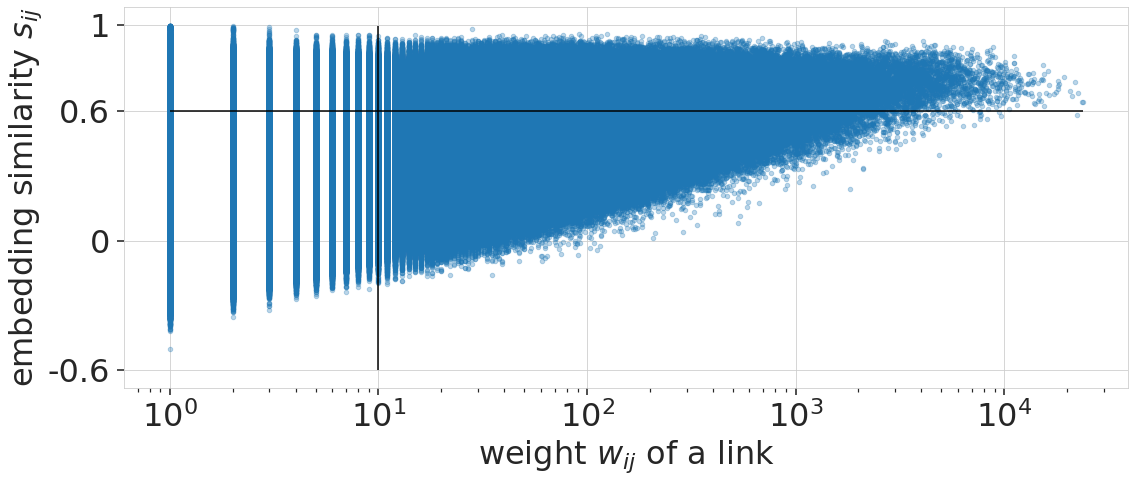

In [31]:
comp_df[comp_df[0] > 0].plot.scatter(0, 1, alpha=.3)
plt.xlabel('weight $w_{ij}$ of a link')
plt.ylabel('embedding similarity $s_{ij}$')
plt.hlines(.6, xmin=1, xmax=comp_df[0].max())
plt.vlines(10, ymin=comp_df[1].min(), ymax=comp_df[1].max())
plt.yticks([-.6, 0, .6, 1], [-.6, 0, .6, 1])
plt.xscale('log')
plt.savefig('./results/weight_emb_scatter_log10.pdf', bbox_inches='tight')

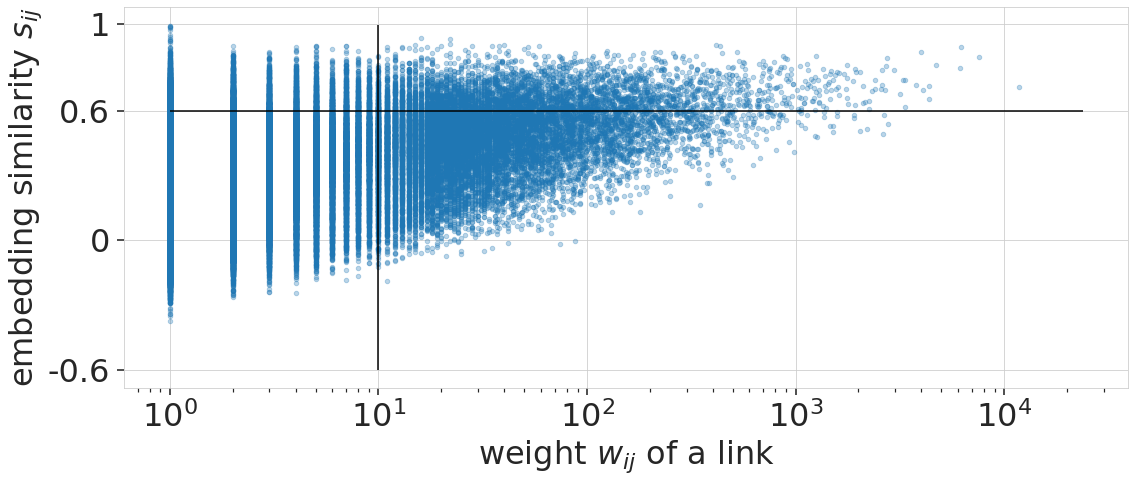

In [38]:
comp_df[comp_df[0] > 0].sample(100_000).plot.scatter(0, 1, alpha=.3)
plt.xlabel('weight $w_{ij}$ of a link')
plt.ylabel('embedding similarity $s_{ij}$')
plt.hlines(.6, xmin=1, xmax=comp_df[0].max())
plt.vlines(10, ymin=comp_df[1].min(), ymax=comp_df[1].max())
plt.yticks([-.6, 0, .6, 1], [-.6, 0, .6, 1])
plt.xscale('log')
plt.savefig('./results/weight_emb_scatter_log10.pdf', bbox_inches='tight')

In [6]:
comp_df['link'] = comp_df[0] != 0
comp_df['link'].value_counts()

False    120542750
True      11139356
Name: link, dtype: int64

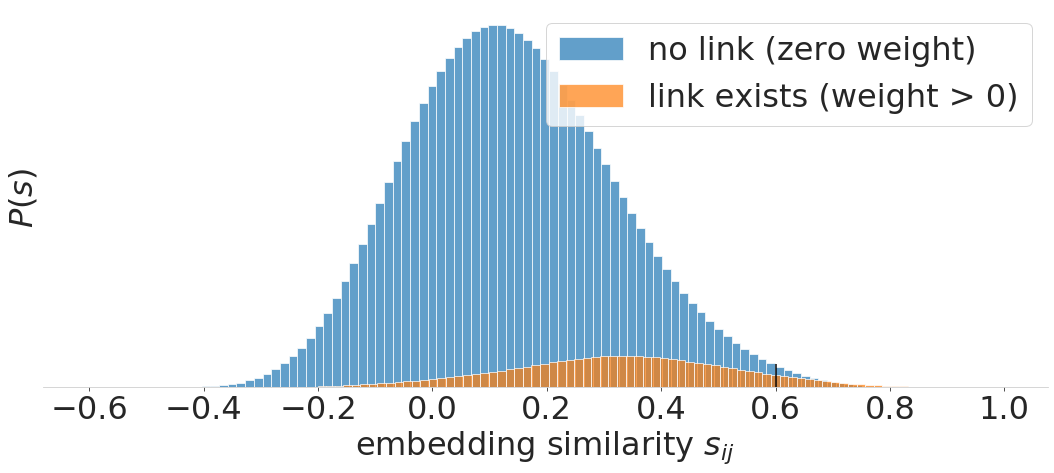

In [15]:
gb = comp_df.groupby('link')[1]
ax = gb.hist(bins=100, alpha=.7)
plt.xlabel('embedding similarity $s_{ij}$')
plt.ylabel('$P(s)$')
plt.yticks([], [])
plt.grid(b=None)
ax.map(lambda x: x.spines['top'].set_visible(False))
ax.map(lambda x: x.spines['left'].set_visible(False))
ax.map(lambda x: x.spines['right'].set_visible(False))
plt.legend(['no link (zero weight)', 'link exists (weight > 0)'])
plt.vlines(.6, ymin=0, ymax=250_000)
plt.savefig('./results/emb_sim_distr.pdf', bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '.75'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
for c in ['size', 'pad', 'width']:
    for a in ['x', 'y']:
        for t in ['major', 'minor']:
            plt.rcParams[f'{a}tick.{t}.{c}'] /= 2

# plt.rcParams['grid.color'] = '.8'

## pairs

In [ ]:
def get_pair_info(pair):
    l_name, r_name = pair
    ln = g_2013.vs.find(name=str(CONCEPTS_NAME_ID_DICT[l_name]))
    rn = g_2013.vs.find(name=str(CONCEPTS_NAME_ID_DICT[r_name]))
    e = (g_2013.subgraph([ln, rn]).es or [{'weight': 0, 'alpha': scaler_2013.index.max()}])[0]
    r = {
        'l_name': l_name,
        'r_name': r_name,
        'l_strength_2013': int(ln['strength']),
        'l_degree_2013': int(ln.degree()),
        'weight_2013': int(e['weight']),
        'p_value_2013': round(e['alpha_p_value'], 4),
        'r_degree_2013': int(rn.degree()),
        'r_strength_2013': int(rn['strength'])
    }
    ln = g_2015.vs.find(name=str(CONCEPTS_NAME_ID_DICT[l_name]))
    rn = g_2015.vs.find(name=str(CONCEPTS_NAME_ID_DICT[r_name]))
    e = (g_2015.subgraph([ln, rn]).es or [{'weight': 0, 'alpha': scaler_2015.index.max()}])[0]
    r.update({
        'l_strength_2015': int(ln['strength']),
        'l_degree_2015': int(ln.degree()),
        'weight_2015': int(e['weight']),
        'p_value_2015': round(e['alpha_p_value'], 4),
        'r_degree_2015': int(rn.degree()),
        'r_strength_2015': int(rn['strength'])
    })
    return r

### ggw

In [ ]:
gg_pairs = list(gpg_2013 & gpg_2015)
len(gg_pairs)

In [ ]:
gg_pairs = ew_2013_s.loc[gg_pairs[:100_000]].sort_values()
gg_pairs.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

In [ ]:
gg_pairs.map(np.log10).hist(bins='auto');

In [ ]:
get_pair_info(gg_pairs.index[0])

In [ ]:
curr_pairs = (gg_pairs[:5].index.tolist() +
              gg_pairs[len(gg_pairs) // 3:len(gg_pairs) // 3 + 5].index.tolist() +
              gg_pairs[len(gg_pairs) // 3 * 2:len(gg_pairs) // 3 * 2+ 5].index.tolist() +
              gg_pairs[-5:].index.tolist())
curr_pairs_table = pd.DataFrame([get_pair_info(p) for p in curr_pairs]).set_index(['l_name', 'r_name'])
curr_pairs_table

In [ ]:
curr_pairs_table.to_csv('./results/ggw.csv')

### bbw

In [ ]:
bb_pairs = list(bpg_2013 & bpg_2015)
len(bb_pairs)

In [ ]:
bb_pairs = ew_2013_s.loc[bb_pairs[:100_000]].sort_values()
bb_pairs.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

In [ ]:
bb_pairs[bb_pairs > 0].map(np.log10).hist(bins='auto');

In [ ]:
get_pair_info(bb_pairs.index[0])

In [ ]:
curr_pairs = (bb_pairs[:5].index.tolist() +
              bb_pairs[(bb_pairs > 0) & (bb_pairs < 4)].index[:5].tolist() +
              bb_pairs[(bb_pairs > 5) & (bb_pairs < 9)].index[:5].tolist() +
              bb_pairs[-5:].index.tolist())
curr_pairs_table = pd.DataFrame([get_pair_info(p) for p in curr_pairs]).set_index(['l_name', 'r_name'])
curr_pairs_table

In [ ]:
curr_pairs_table.to_csv('./results/bbw.csv')

### bgw

In [ ]:
bg_pairs = list(bpg_2013 & gpg_2015)
len(bg_pairs)

In [ ]:
bg_pairs = ew_2013_s.loc[bg_pairs].sort_values()
bg_pairs.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

In [ ]:
bg_pairs[bg_pairs > 0].map(np.log10).hist(bins='auto');

In [ ]:
get_pair_info(bg_pairs.index[0])

In [ ]:
curr_pairs = (bg_pairs[:5].index.tolist() +
              bg_pairs[len(bg_pairs) // 3:len(bg_pairs) // 3 + 5].index.tolist() +
              bg_pairs[len(bg_pairs) // 3 * 2:len(bg_pairs) // 3 * 2+ 5].index.tolist() +
              bg_pairs[-5:].index.tolist())
curr_pairs_table = pd.DataFrame([get_pair_info(p) for p in curr_pairs]).set_index(['l_name', 'r_name'])
curr_pairs_table

In [ ]:
curr_pairs_table.to_csv('./results/bgw.csv')